# NB
## Problems:
* To work with regressors a huge amount of dataset is needed
* The dataset I am working on contains less than 100 information
* That's why the models couldn't learn enough to predict accurately

# Importing Libraries

In [1]:
from importlib import import_module
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time

#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

#importing oneHotEncoder and column transformer for converting text to numeric data and transforming the columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importing all the regressors

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor

# Importing dataset and creating X and y's for training and testing

In [29]:
agds = pd.read_csv("data/agriculturalDataset.csv")
agds["area"].fillna(agds["area"].mean(),
                                     inplace=True)

X = agds.drop(["aus", "aman", "boro", "wheat", "potato", "jute"], axis = 1)
aus_y = agds["aus"]
aman_y = agds["aman"]
boro_y = agds["boro"]
wheat_y = agds["wheat"]
potato_y = agds["potato"]
jute_y = agds["jute"]

# Transforming columns which holds string values

In [4]:
#transforming our dataframe cells which have text values, converting them to numbers
categorical_features = ["District", "storm"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)

# Create Train and Test data
## List of target
* Aus
* Aman
* Boro
* Wheat
* Potato
* Jute

In [5]:
#Creating train data and test data

aus_X_train, aus_X_test, aus_y_train, aus_y_test = train_test_split(transformed_X, aus_y, test_size=0.2)
aman_X_train, aman_X_test, aman_y_train, aman_y_test = train_test_split(transformed_X, aman_y, test_size=0.2)
boro_X_train, boro_X_test, boro_y_train, boro_y_test = train_test_split(transformed_X, boro_y, test_size=0.2)
wheat_X_train, wheat_X_test, wheat_y_train, wheat_y_test = train_test_split(transformed_X, wheat_y, test_size=0.2)
potato_X_train, potato_X_test, potato_y_train, potato_y_test = train_test_split(transformed_X, potato_y, test_size=0.2)
jute_X_train, jute_X_test, jute_y_train, jute_y_test = train_test_split(transformed_X, jute_y, test_size=0.2)

# Creating a dictionary of models
## Result for each target
### Execution time for each taeget

In [6]:
models = {"RandomForestRegressor": RandomForestRegressor(),
         "KNeighborsRegressor": KNeighborsRegressor(),
         "GradientBoostingRegressor": GradientBoostingRegressor(),
         "AdaBoostRegressor": AdaBoostRegressor(),
         "DecisionTreeRegressor": DecisionTreeRegressor()}

accuracy = {"aus": {},
            "aman": {},
            "boro": {},
            "wheat": {},
            "potato": {},
            "jute": {}}

exec_time = {"aus": {},
            "aman": {},
            "boro": {},
            "wheat": {},
            "potato": {},
            "jute": {}}
models, accuracy, exec_time

({'RandomForestRegressor': RandomForestRegressor(),
  'KNeighborsRegressor': KNeighborsRegressor(),
  'GradientBoostingRegressor': GradientBoostingRegressor(),
  'AdaBoostRegressor': AdaBoostRegressor(),
  'DecisionTreeRegressor': DecisionTreeRegressor()},
 {'aus': {}, 'aman': {}, 'boro': {}, 'wheat': {}, 'potato': {}, 'jute': {}},
 {'aus': {}, 'aman': {}, 'boro': {}, 'wheat': {}, 'potato': {}, 'jute': {}})

# Function to get accuracy score and Execution time

In [7]:
def trainTestEx(models, X_train, X_test, y_train, y_test, name):
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    exec_time[name][model_name] = (end_time - start_time)
    accuracy[name][model_name] = model.score(X_test, y_test)

# Function to plot Accuracy comparison bar

In [8]:
def accuracyDataFrame(resultOfAccuracy, name):
  dataframe_of_aus_accuracy_result = pd.DataFrame(resultOfAccuracy.values(),
                          resultOfAccuracy.keys(),
                          columns=["Accuracy for {}".format(name)])
  dataframe_of_aus_accuracy_result.plot.bar();

# Function to plot Execution comparison bar

In [9]:
def executionDataFrame(resultOfexecution, name):
  dataframe_of_aus_execution_result = pd.DataFrame(resultOfexecution.values(),
                          resultOfexecution.keys(),
                          columns=["Excecution for {}".format(name)])
  dataframe_of_aus_execution_result.plot.bar();

# Training and Testing models (Aus)

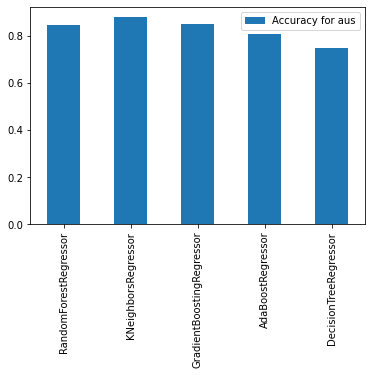

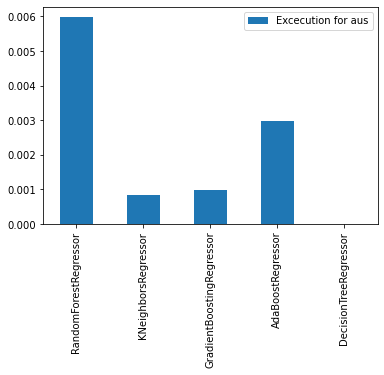

In [10]:
name = "aus"

trainTestEx(models, aus_X_train, aus_X_test, aus_y_train, aus_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Aman)

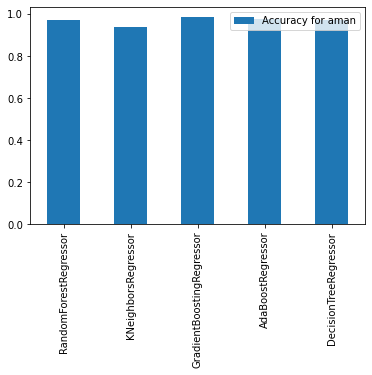

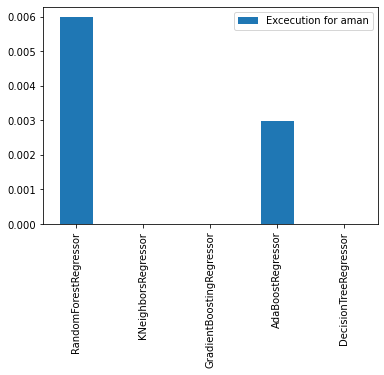

In [11]:
name = "aman"

trainTestEx(models, aman_X_train, aman_X_test, aman_y_train, aman_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Boro)

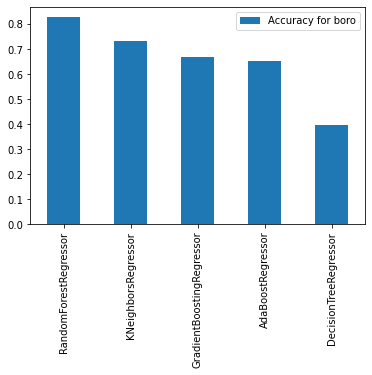

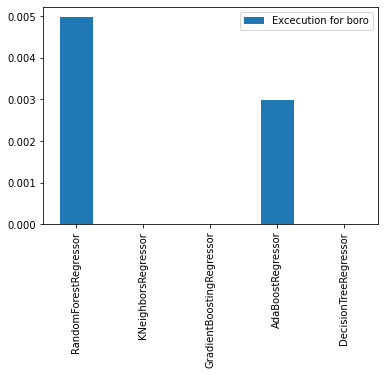

In [12]:
name = "boro"

trainTestEx(models, boro_X_train, boro_X_test, boro_y_train, boro_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Wheat)

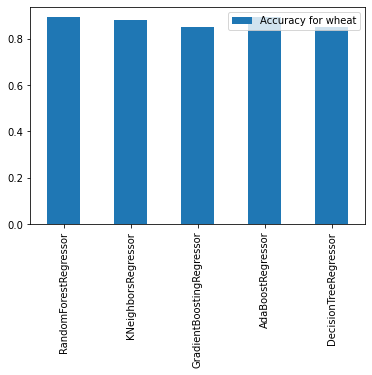

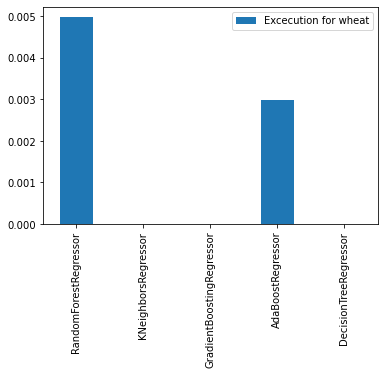

In [13]:
name = "wheat"

trainTestEx(models, wheat_X_train, wheat_X_test, wheat_y_train, wheat_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Potato)

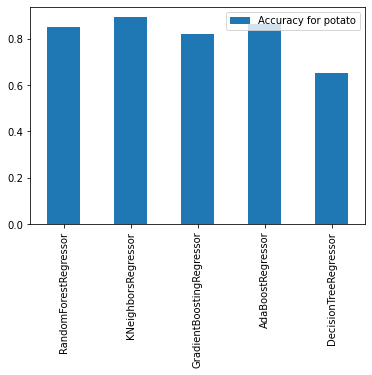

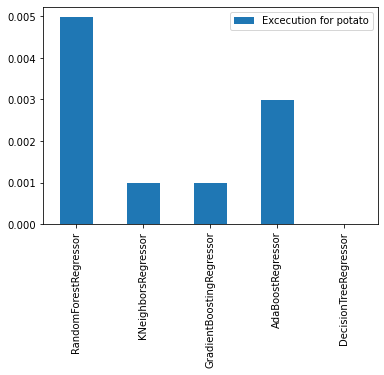

In [14]:
name = "potato"

trainTestEx(models, potato_X_train, potato_X_test, potato_y_train, potato_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Jute)

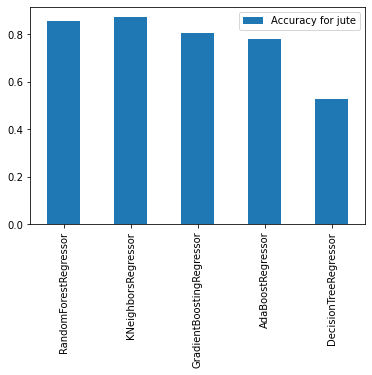

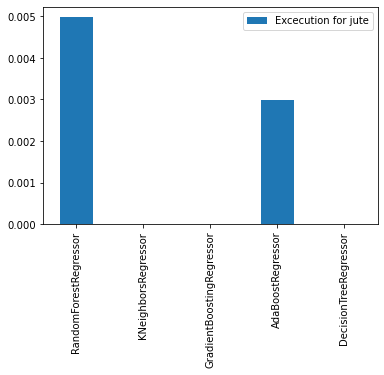

In [15]:
name = "jute"

trainTestEx(models, jute_X_train, jute_X_test, jute_y_train, jute_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Mean Absolute Error for one target (aus) is calculated

In [18]:
from sklearn.metrics import mean_absolute_error

prediction_rfc_aus = models["RandomForestRegressor"].predict(aus_X_test)
prediction_knc_aus = models["KNeighborsRegressor"].predict(aus_X_test)
prediction_gbr_aus = models["GradientBoostingRegressor"].predict(aus_X_test)
prediction_abr_aus = models["AdaBoostRegressor"].predict(aus_X_test)
prediction_dtr_aus = models["DecisionTreeRegressor"].predict(aus_X_test)

mae_rfc_aus = mean_absolute_error(aus_y_test, prediction_rfc_aus)
mae_knc_aus = mean_absolute_error(aus_y_test, prediction_knc_aus)
mae_gbr_aus = mean_absolute_error(aus_y_test, prediction_gbr_aus)
mae_abr_aus = mean_absolute_error(aus_y_test, prediction_abr_aus)
mae_dtr_aus = mean_absolute_error(aus_y_test, prediction_dtr_aus)

print("Mean Absolute Error of rfc: {}".format(mae_rfc_aus))
print("Mean Absolute Error of knc: {}".format(mae_knc_aus))
print("Mean Absolute Error of gbr: {}".format(mae_gbr_aus))
print("Mean Absolute Error of abr: {}".format(mae_abr_aus))
print("Mean Absolute Error of dtr: {}".format(mae_dtr_aus))

Mean Absolute Error of rfc: 76888.775
Mean Absolute Error of knc: 85512.32857142856
Mean Absolute Error of gbr: 74733.86623708741
Mean Absolute Error of abr: 74425.83199657487
Mean Absolute Error of dtr: 73429.21428571429


# Showing the comaparison using DataFrame

In [21]:
com_rfc_aus_df = pd.DataFrame(data={"Actual value": aus_y_test,
                                   "predicted value of rfc": prediction_rfc_aus,
                                   "predicted value of knc": prediction_knc_aus,
                                   "predicted value of gbr": prediction_gbr_aus,
                                   "predicted value of abr": prediction_abr_aus,
                                   "predicted value of dtr": prediction_dtr_aus,})

com_rfc_aus_df

,Actual value,predicted value of rfc,predicted value of knc,predicted value of gbr,predicted value of abr,predicted value of dtr
34,46162,136274.15,112938.4,152240.557612,133783.727273,152952.0
40,75085,88749.26,77464.6,96317.327307,84230.272727,96470.0
62,48583,80796.37,111697.4,61712.251711,80125.285714,61146.0
12,106457,78406.32,78443.6,66634.805494,80125.285714,70999.0
15,4086,10384.36,10895.8,10585.692628,13317.000000,10338.0
0,804,43362.50,53008.4,30319.618049,43614.571429,29825.0
53,546,208008.27,203312.8,220900.307161,212839.600000,221236.0
4,447,159385.74,203312.8,125749.927542,125166.000000,125166.0
33,108383,93089.52,72370.4,103757.823231,91350.285714,104468.0
43,6324,11688.19,13622.4,13252.338430,13317.000000,13464.0


# Yielding result for test set 
* Target (Aus)
* The test cases will be compared later
* If you want to change test data set than comment our np.random.seed line

In [58]:
np.random.seed(3)

test_arr = np.random.randint(500, 100000, (1,45))

### Random Forest regressor

In [60]:
test_predict = models["RandomForestRegressor"].predict(test_arr)
test_predict

array([118027.42])

### KNeighbors Regressor

In [61]:
test_predict = models["KNeighborsRegressor"].predict(test_arr)
test_predict

array([3402.4])

### Gradient Boosting Regressor

In [62]:
test_predict = models["GradientBoostingRegressor"].predict(test_arr)
test_predict

array([60078.93596694])

### Ada Boost Regressor

In [63]:
test_predict = models["AdaBoostRegressor"].predict(test_arr)
test_predict

array([125166.])

### DecisionTree Regressor

In [64]:
test_predict = models["DecisionTreeRegressor"].predict(test_arr)
test_predict

array([199718.])

## Our goal
* Is to suggest a suitable crop which will yield the most
* Find the best regressor for finding the most yielding crop
* Find the best classifier which will suggest the crop